# Esercitazione 9

**27 Aprile 2023**

*Gradiente e gradiente coniugato*

## Esercizio 1
Implementare una funzione **steepestdescent(A,b,x0,itmax,tol)** che implementa il metodo di discesa più ripida del gradiente per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente $ \frac{||r^{(k)}||_2} {||b||_2}$ iterazione per iterazione

- un array contenente le soluzioni ad ogni iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $ \frac{||r^{(k)}||_2} {||b||_2} < toll$

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def steepestdescent(A,b,x0,itmax,tol):
    n,m = A.shape
    if n!=m :
        print("Matrice non quadrata")
        return [],[],[],[]
    
    x = x0
    r = A@x -b
    p = -r
    nb = np.linalg.norm(b)  #default norma 2
    errore = np.linalg.norm(r)/nb
    vec_sol = []
    vec_sol.append(x)
    vec_err = []
    vec_err.append(errore)
    
    it = 0
    while errore>=tol and it<=itmax :
        it = it + 1
        Ap = A@p
        rTr = np.dot(r.T, r)
        alpha = rTr / np.dot(p.T, Ap)
        x = x + alpha*p
        vec_sol.append(x)
        r = r + alpha*Ap
        errore = np.linalg.norm(r) / nb
        vec_err.append(errore)
        p = -r
        
    return x, vec_err, vec_sol, it

Soluzione gradiente
 [[1.]
 [1.]]
Iterazioni:  10


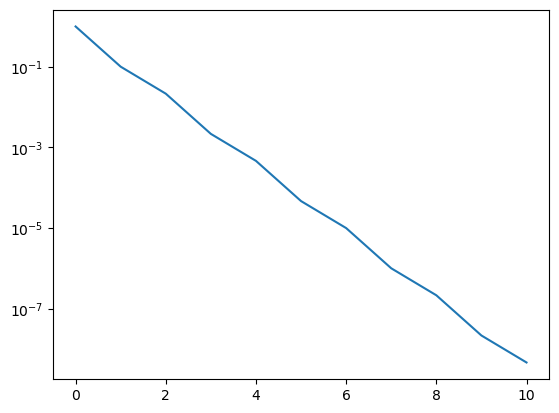

In [18]:
A = np.array([[8,3], [3,14]])
n = A.shape[0]
b = np.sum(A, axis=1).reshape(n,1)  #somma delle colonne
x0 = np.zeros_like(b)
tol = 1e-8
itmax = 500
xG, vec_errG, vec_solG, itG = steepestdescent(A,b,x0,itmax,tol)
plt.semilogy(np.arange(itG+1), vec_errG)
print("Soluzione gradiente\n", xG)
print("Iterazioni: ", itG)

## Esercizio 2
Implementare una funzione **conjugate_gradient(A,b,x0,itmax,tol)** che implementa il metodo del gradiente coniugato per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente $ \frac{||r^{(k)}||_2} {||b||_2}$ iterazione per iterazione
- un array contenente le soluzioni ad ogni iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $ \frac{||r^{(k)}||_2} {||b||_2} < toll$

In [21]:
def conjugate_gradient(A,b,x0,itmax,tol):
    m,n = A.shape
    if m != n:
        print("Matrice non quadrata")
        return [],[],[],[]
    
    x = x0
    r = A@x -b
    p = -r
    nb = np.linalg.norm(b)  #default norma 2
    errore = np.linalg.norm(r)/nb
    vec_sol = []
    vec_sol.append(x)
    vec_err = []
    vec_err.append(errore)
    
    it = 0
    while errore>=tol and it<=itmax :
        it = it + 1
        Ap = A@p
        rTr = np.dot(r.T, r)
        alpha = rTr / np.dot(p.T, Ap)
        x = x + alpha*p
        vec_sol.append(x)
        r = r + alpha*Ap
        gamma =  np.dot(r.T, r) / rTr #rispetto al gradiente aggiungo un coefficiente gamma per calcolare la nuova direzione
        errore = np.linalg.norm(r) / nb
        vec_err.append(errore)
        p = -r + gamma*p  #rispetto al gradiente cambia la direzione che non è l'antigradiente, ma viene modificata con la direzione al passo precedente per gamma
        
    return x, vec_err, vec_sol, it

Soluzione coniugato
 [[1.]
 [1.]]
Iterazioni:  2


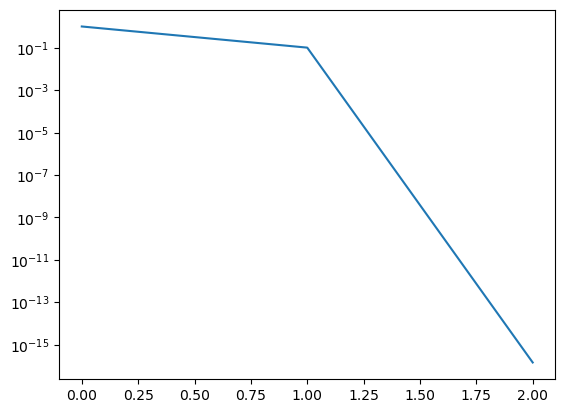

In [53]:
A = np.array([[8,3], [3,14]])
n = A.shape[0]
b = np.sum(A, axis=1).reshape(n,1)  #somma delle colonne
x0 = np.zeros_like(b)
tol = 1e-8
itmax = 500
xC, vec_errC, vec_solC, itC = conjugate_gradient(A,b,x0,itmax,tol)
plt.semilogy(np.arange(itC+1), vec_errC)
print("Soluzione coniugato\n", xC)
print("Iterazioni: ", itC)

## Esercizio 3
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$

- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson con ordine che va da 10 a 100 con step 2,  e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo del gradiente e del gradiente coniugato  

In [40]:
def creaPoisson(n):
    d = np.ones((n,))*4
    e = -np.ones((n-1,))
    f = -np.ones((n-3,))
    #modifico con i vettori d,e,f la diagonale e le codiagonali
    A = np.diag(d) + np.diag(e,1) + np.diag(e,-1) + np.diag(f,3) + np.diag(f,-3)
    
    return A

fattoreR_G  0.8451732757464313
fattoreR_C  0.5507836151333829
fattoreR_G  0.8838154929670643
fattoreR_C  0.6021215702817415
fattoreR_G  0.9097472940571558
fattoreR_C  0.6428571456457745
fattoreR_G  0.927945223708054
fattoreR_C  0.675991843931141
fattoreR_G  0.9411857437203913
fattoreR_C  0.703485346710126
fattoreR_G  0.9511047565157278
fattoreR_C  0.7266618198187997
fattoreR_G  0.958721900772983
fattoreR_C  0.7464673342705945
fattoreR_G  0.9646950704194518
fattoreR_C  0.7635890967813163
fattoreR_G  0.9694637387781213
fattoreR_C  0.7785389670041902
fattoreR_G  0.9733303084522399
fattoreR_C  0.7917063904667544
fattoreR_G  0.9765081679578405
fattoreR_C  0.8033927795472282
fattoreR_G  0.9791513039245489
fattoreR_C  0.8138351189713889
fattoreR_G  0.9813730472920217
fattoreR_C  0.823222327661089
fattoreR_G  0.9832582778118989
fattoreR_C  0.8317068649519881
fattoreR_G  0.9848715685248072
fattoreR_C  0.8394131318228903
fattoreR_G  0.9862627389440614
fattoreR_C  0.8464436481140536
fattoreR_G  0

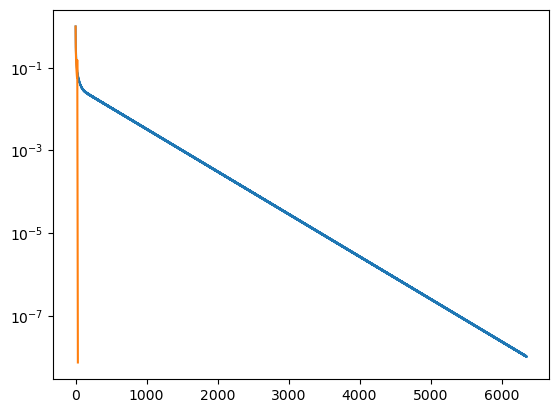

In [60]:
for i in range(10,101,2):
    A2 = creaPoisson(i)
    n = A2.shape[0]
    b = np.sum(A2, axis=1).reshape(n,1)  #somma delle colonne
    x0 = np.zeros_like(b)
    tol = 1e-8
    itmax = 6500
    xG, vec_errG, vec_solG, itG = steepestdescent(A2,b,x0,itmax,tol)
    xC, vec_errC, vec_solC, itC = conjugate_gradient(A2,b,x0,itmax,tol)
    #print("Soluzione gradiente\n", xG)
    #print("Soluzione coniugato\n", xC)
    fattoreR_G = ((np.linalg.cond(A2))-1) / ((np.linalg.cond(A2))+1)
    fattoreR_C = ((np.sqrt(np.linalg.cond(A2)))-1) / ((np.sqrt(np.linalg.cond(A2)))+1)
    print("fattoreR_G ", fattoreR_G)
    print("fattoreR_C ", fattoreR_C)
plt.semilogy(np.arange(itG+1), vec_errG, np.arange(itC+1), vec_errC)

## Esercizio 4
Consideriamo il sistema lineare Ax=b  dov A è  la matrice di Hilbert di dimensione 5, costruita usando la funzione hilbert(n) di scipy.linalg (A=scipy.linalg.hilbert(5)) in modo tale che la soluzione esatta sia $x = (1, 1, . . . , 1)^T$ .
Risolvere il sistema lineare usando sia il metodi del gradiente che il metodo del gradiente coniugato e confrontarne gli errori ad ogni iterazione.

## Esercizio 5
Importare il file creaG ed utilizzare le funzioni sottospecificate per creare, scelto $n$,  una matrice D di ordine $m=(n-2)^2$

*import creaG*

*G = creaG.numgrid(n)*

*D = creaG.delsq(G).todense().getA()*

Risolvere il sistema lineare Dx=b, con matrice G di ordine m=16 ed ordine m=400, (scegliere n in maniera opportuna), usando i metodi del gradiente e del gradiente coniugato. Confrontare gli errori su uno stesso grafico e giustifcare i risultati alla luce del risultato teorico della maggiorazione dell'errore per entrambi i metodi